In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

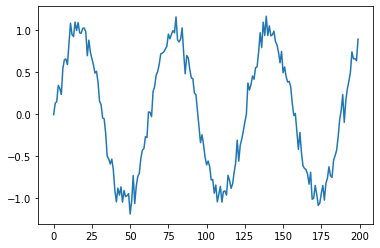

In [105]:
series = np.sin(0.1 * np.arange(200))+np.random.randn(200)*0.1
plt.plot(series)
plt.show()

# Build the dataset

In [106]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    y=series[t+T]
    X.append(x)
    Y.append(y)
    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print(X.shape, Y.shape, N)

(190, 10) (190,) 190


In [108]:
N, D = X.shape
print(N,D)

190 10


# AutoRegressive Linear Model

In [109]:
i = Input(shape=(D,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse',
             optimizer=Adam(lr=0.1))

In [110]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 4ms/sample - loss: 0.6658 - val_loss: 0.3354
Epoch 2/80
95/95 [==============================] - 0s 183us/sample - loss: 0.2217 - val_loss: 0.1004
Epoch 3/80
95/95 [==============================] - 0s 206us/sample - loss: 0.0562 - val_loss: 0.0315
Epoch 4/80
95/95 [==============================] - 0s 185us/sample - loss: 0.0533 - val_loss: 0.0790
Epoch 5/80
95/95 [==============================] - 0s 190us/sample - loss: 0.0987 - val_loss: 0.1066
Epoch 6/80
95/95 [==============================] - 0s 168us/sample - loss: 0.0951 - val_loss: 0.0885
Epoch 7/80
95/95 [==============================] - 0s 178us/sample - loss: 0.0733 - val_loss: 0.0451
Epoch 8/80
95/95 [==============================] - 0s 199us/sample - loss: 0.0334 - val_loss: 0.0300
Epoch 9/80
95/95 [==============================] - 0s 189us/sample - loss: 0.0200 - val_loss: 0.0289
Epoch 10/80
95/95 [=====================

Epoch 80/80
95/95 [==============================] - 0s 181us/sample - loss: 0.0139 - val_loss: 0.0178


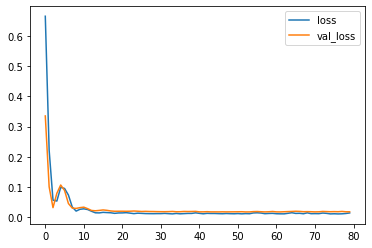

In [111]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [112]:
X[0]

array([-0.00704918,  0.12932009,  0.14872109,  0.34175733,  0.30660292,
        0.23378166,  0.54348627,  0.64813034,  0.65707551,  0.59013027])

In [113]:
X[0].reshape(1,-1)

array([[-0.00704918,  0.12932009,  0.14872109,  0.34175733,  0.30660292,
         0.23378166,  0.54348627,  0.64813034,  0.65707551,  0.59013027]])

In [114]:
model.predict(X[0].reshape(1,-1))

array([[0.70208806]], dtype=float32)

# Wrong method to do forcast (kind of overfit in case of noise)

In [115]:
validation_target=Y[-N//2:]
validation_predictions=[]

i=-N//2

while (len(validation_predictions)<len(validation_target)):
    pred=model.predict(X[i].reshape(1,-1))[0,0]
    i+=1
    
    validation_predictions.append(pred)

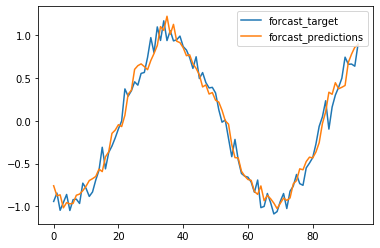

In [116]:
plt.plot(validation_target, label='forcast_target')
plt.plot(validation_predictions, label='forcast_predictions')
plt.legend()

# Correct Method

In [117]:
#Use only self made predictions to predict future values

In [118]:
validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]
while(len(validation_predictions)<len(validation_target)):
    pred=model.predict(last_x.reshape(1,-1))[0,0]
      
    #update the predictions list
    validation_predictions.append(pred)
      
    #make new input using our predictions
    last_x=np.roll(last_x,-1)
    last_x[-1]=pred

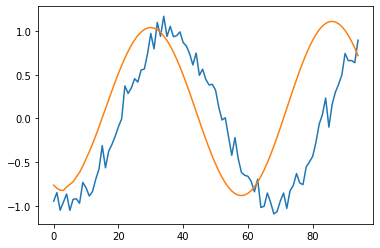

In [119]:
plt.plot(validation_target, label='forcast_target')
plt.plot(validation_predictions, label='forcast_predictions')